## Interacting with results from the VAST Pipeline

This notebook gives an example of how to use vast-tools in a notebook environment to interact with output from the VAST Pipeline (https://github.com/askap-vast/vast-pipeline).

Below are the imports required for this example. The main import required from vast-tools is the Pipeline class. Astropy objects are also imported as well as bokeh as some plots use the bokeh library. Note that we initialise the bokeh function `output_notebook()` such that bokeh outputs are shown in the notebook environment. `matplotlib.pyplot` is also imported in case we want to manage any plots produced.

In [1]:
from vasttools.pipeline import Pipeline
from bokeh.io import output_notebook
from bokeh.plotting import show
from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt

output_notebook()

Loading BokehJS ...

### Loading a Pipeline run

The first step is to initialise the Pipeline object using the directory of the pipeline runs. If you are running the pipeline on a system you are not administrating, ask your admin if you are not sure where the pipeline directory is located.

In [2]:
pipe = Pipeline("/Users/adam/GitHub/vast-pipeline/pipeline-runs/")

If you are unsure of the run name you want to load, you can use the `list_piperuns()` method to list all available runs.

In [3]:
pipe.list_piperuns()

['S190814bv', 'VAST_2118-06A', 'VAST_Test', 'demo', 'demo2', 'test-data']

For this example we will load the `VAST_2118-06A` run. To do this we call the `load_run()` method and save the run to `my_run`:

In [4]:
my_run = pipe.load_run('VAST_2118-06A')

This has loaded all the outputs and information of the pipeline run. You have access to the following dataframes:

1. `my_run.images` contains the information on the images used in the pipeline run.

In [5]:
my_run.images.head()

band_id  skyreg_id                                  measurements_path  \
id                                                                          
1         1          1  /Users/adam/GitHub/vast-pipeline/pipeline-runs...   
2         1          2  /Users/adam/GitHub/vast-pipeline/pipeline-runs...   
3         1          2  /Users/adam/GitHub/vast-pipeline/pipeline-runs...   
4         1          2  /Users/adam/GitHub/vast-pipeline/pipeline-runs...   
5         1          2  /Users/adam/GitHub/vast-pipeline/pipeline-runs...   

   polarisation                           name  \
id                                               
1             I   VAST_2118+00A.EPOCH01.I.fits   
2             I   VAST_2118-06A.EPOCH01.I.fits   
3             I   VAST_2118-06A.EPOCH02.I.fits   
4             I  VAST_2118-06A.EPOCH03x.I.fits   
5             I  VAST_2118-06A.EPOCH05x.I.fits   

                                                 path  \
id                                                      
1   /Users/adam/testing/vast-tools-testing/PSR_J21...   
2   /Users/adam/testing/vast-tools-testing/PSR_J21...   
3   /Users/adam/testing/vast-tools-testing/PSR_J21...   
4   /Users/adam/testing/vast-tools-testing/PSR_J21...   
5   /Users/adam/testing/vast-tools-testing/PSR_J21...   

                                           noise_path  \
id                                                      
1   /Users/adam/testing/vast-tools-testing/PSR_J21...   
2   /Users/adam/testing/vast-tools-testing/PSR_J21...   
3   /Users/adam/testing/vast-tools-testing/PSR_J21...   
4   /Users/adam/testing/vast-tools-testing/PSR_J21...   
5   /Users/adam/testing/vast-tools-testing/PSR_J21...   

                                      background_path  valid  \
id                                                             
1   /Users/adam/testing/vast-tools-testing/PSR_J21...   True   
2   /Users/adam/testing/vast-tools-testing/PSR_J21...   True   
3   /Users/adam/testing/vast-tools-testing/PSR_J21...   True   
4   /Users/adam/testing/vast-tools-testing/PSR_J21...   True   
5   /Users/adam/testing/vast-tools-testing/PSR_J21...   True   

                           datetime  ...   beam_bpa  rms_median   rms_min  \
id                                   ...                                    
1  2019-08-27 13:38:38.810000+00:00  ... -49.187650    0.270237  0.185790   
2  2019-08-27 18:52:00.556000+00:00  ... -70.402943    0.267957  0.179847   
3  2019-10-30 10:11:56.913000+00:00  ...  75.375255    0.243300  0.163784   
4  2019-10-29 13:39:33.996000+00:00  ... -82.036874    0.248223  0.162059   
5  2020-01-11 05:40:11.007000+00:00  ...  70.737592    0.252249  0.170839   

     rms_max  flux_percentile   centre_ra  centre_dec  xtr_radius  frequency  \
id                                                                             
1   1.319099                0  319.652442    0.003076    6.724881        887   
2   1.726998                0  319.652258   -6.298900    6.740103        887   
3   1.672402                0  319.652258   -6.298900    6.740103        887   
4   2.286700                0  319.652258   -6.298900    6.740103        887   
5   1.824399                0  319.652258   -6.298900    6.740103        887   

    bandwidth  
id             
1           0  
2           0  
3           0  
4           0  
5           0  

[5 rows x 33 columns]

2. `my_run.sources` contains the information on the unique sources found in the pipeline run.

In [6]:
my_run.sources.head()

wavg_ra  wavg_dec  avg_compactness  wavg_uncertainty_ew  \
id                                                               
1   321.972731  0.699851         1.191653             0.000148   
2   323.714036 -2.603739         0.984136             0.000061   
3   322.061919 -3.652187         1.106793             0.000064   
4   316.331532 -2.608983         1.114564             0.000059   
5   323.795974  1.830176         1.067300             0.000152   

    wavg_uncertainty_ns  avg_flux_int  avg_flux_peak  max_flux_peak     v_int  \
id                                                                              
1              0.000148     17.161000      14.401000         14.401  0.000000   
2              0.000061     14.835333      15.056000         16.293  0.220432   
3              0.000064     11.282667      10.265667         14.492  0.318601   
4              0.000059     15.655833      14.061667         14.497  0.166578   
5              0.000152     15.288000      14.324000         14.324  0.000000   

      v_peak    eta_int    eta_peak    new  new_high_sigma  n_neighbour_dist  \
id                                                                             
1   0.000000   0.000000    0.000000  False             0.0          0.079768   
2   0.048307  34.020121    4.770111  False             0.0          0.067181   
3   0.320678  44.727039  144.445660  False             0.0          0.048327   
4   0.033468  35.340322    3.707992  False             0.0          0.072471   
5   0.000000   0.000000    0.000000  False             0.0          0.048551   

    n_measurements  n_selavy  n_forced  n_siblings  n_relations  
id                                                               
1                1         1         0           0            0  
2                6         6         0           0            0  
3                6         6         0           0            0  
4                6         6         0           0            0  
5                1         1         0           0            0

3. `my_run.measurements` contains the information on all of the measurements found in the pipeline run, both from selavy and forced (if used in the pipeline run). Measurements are the datapoints in time of a `source`, hence the source column tells you which source the measurement belongs to.

In [7]:
my_run.measurements.head()

island_id            component_id  local_rms          ra  \
0  SB9667_island_1000  SB9667_component_1000a      0.288  321.972731   
1  SB9667_island_1001  SB9667_component_1001a      0.246  317.111595   
2  SB9667_island_1002  SB9667_component_1002a      0.275  322.974588   
3  SB9667_island_1003  SB9667_component_1003a      0.327  315.077869   
4  SB9667_island_1004  SB9667_component_1004a      0.300  315.567810   

     ra_err       dec   dec_err  flux_peak  flux_peak_err  flux_int  ...  \
0  0.000038  0.699851  0.000035     14.401       0.299148    17.161  ...   
1  0.000038  0.539810  0.000039     14.155       0.265187    22.503  ...   
2  0.000040  1.790072  0.000053     14.823       0.297339    29.077  ...   
3  0.000046  3.011253  0.000037     14.526       0.332071    16.204  ...   
4  0.000035 -0.299919  0.000034     14.722       0.305109    15.815  ...   

      weight_ns  forced  id  source  d2d   dr  \
0  4.551126e+07   False   1       1  0.0  0.0   
1  4.496530e+07   False   2    9371  0.0  0.0   
2  4.214069e+07   False   3    7805  0.0  0.0   
3  4.400330e+07   False   4    6204  0.0  0.0   
4  4.610781e+07   False   5   15535  0.0  0.0   

                                               image  \
0  /Users/adam/testing/vast-tools-testing/PSR_J21...   
1  /Users/adam/testing/vast-tools-testing/PSR_J21...   
2  /Users/adam/testing/vast-tools-testing/PSR_J21...   
3  /Users/adam/testing/vast-tools-testing/PSR_J21...   
4  /Users/adam/testing/vast-tools-testing/PSR_J21...   

                                                 rms  \
0  /Users/adam/testing/vast-tools-testing/PSR_J21...   
1  /Users/adam/testing/vast-tools-testing/PSR_J21...   
2  /Users/adam/testing/vast-tools-testing/PSR_J21...   
3  /Users/adam/testing/vast-tools-testing/PSR_J21...   
4  /Users/adam/testing/vast-tools-testing/PSR_J21...   

                                              selavy  frequency  
0  /Users/adam/GitHub/vast-pipeline/pipeline-runs...        887  
1  /Users/adam/GitHub/vast-pipeline/pipeline-runs...        887  
2  /Users/adam/GitHub/vast-pipeline/pipeline-runs...        887  
3  /Users/adam/GitHub/vast-pipeline/pipeline-runs...        887  
4  /Users/adam/GitHub/vast-pipeline/pipeline-runs...        887  

[5 rows x 46 columns]

You also have access to: 
* `my_run.relations` which contains the relation information of the pipeline run, i.e. what source is related to another source.
* `my_run.skyregions` which contains the sky region information of the pipeline run.

You should rarely need to access these, but are there in case they are required.

### Looking at a specific source

We can load any source into a vast-tools source instance (like those used in other notebook examples) by using the `my_run.get_source(id)` function. The `id` is the same id as listed in the sources table. Below I load the source with the `id = 2`.

In [8]:
my_source = my_run.get_source(2)

All the normal functions are available (in the pipeline case, each datapoint is it's own epoch, e.g. to load the first datapoint you would load epoch `1`).

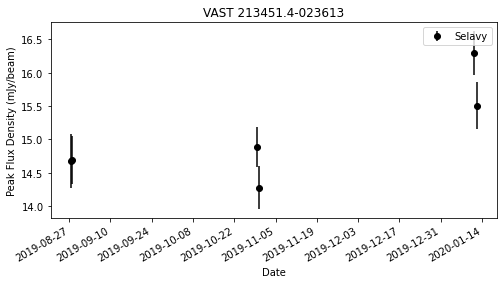

In [9]:
lc = my_source.plot_lightcurve()
lc

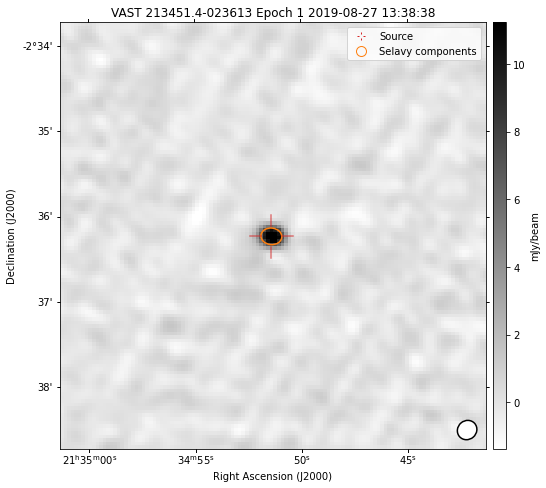

In [10]:
epoch1 = my_source.show_png_cutout(1)
epoch1

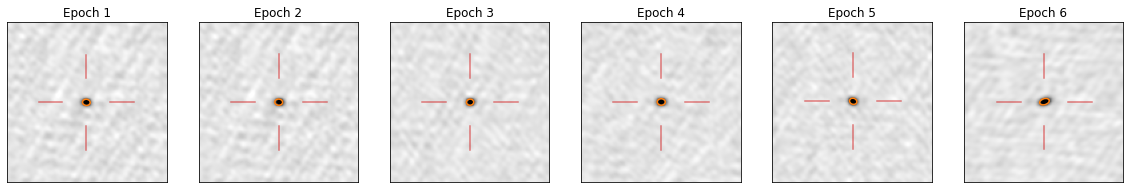

In [11]:
all_cutouts = my_source.plot_all_cutouts(columns=6, figsize=(20,10))
all_cutouts

In [12]:
ned_results = my_source.ned_search()
ned_results

<Table length=5>
 No.         Object Name            RA     ... Diameter Points Associations
                                 degrees   ...                             
int32          bytes30           float64   ...      int32         int32    
----- ------------------------- ---------- ... --------------- ------------
    1 WISEA J213450.42-023602.4  323.71012 ...               0            0
    2 WISEA J213450.48-023617.2  323.71037 ...               0            0
    3       NVSS J213451-023611    323.713 ...               0            0
    4 WISEA J213451.99-023630.7  323.71665 ...               0            0
    5 WISEA J213452.05-023611.0   323.7169 ...               0            0

## Performing transient and variable analysis

There are a couple of built-in analyses that you can perform on the data.

1. **Two-epoch analysis** (e.g. Mooley et al., 2016; https://ui.adsabs.harvard.edu/abs/2016ApJ...818..105M/abstract).
2. **eta-v sigma analysis** (e.g. Rowlinson et al., 2019; https://ui.adsabs.harvard.edu/abs/2019A%26C....27..111R/abstract; though no machine learning is used here, only sigma cuts).

First demo will be the two epoch analysis.

### Two-epoch analysis

The analysis is called using the `my_run.run_two_epoch_analysis` function. One input it takes is a query string such that we can filter the data, that's what is defined below:

In [13]:
my_query_string = (
    "n_measurements >= 3 "
    "& n_selavy >= 2 "
    "& n_neighbour_dist > 1./60. "
    "& 0.8 < avg_compactness < 1.4 "
    "& n_relations == 0"
)

Here we are asking for sources that:

* have 3 or more measurements,
* are detected in selavy at least 2 times,
* are 1 arcmin away from their nearest neighbour,
* have an average compactness value (f_int / f_peak) between 0.8 and 1.4,
* and have no relations.

**Note**: This is an example of cuts you may wish to make. Consider your own science goals when making the selections.

We can then pass this string into the two epoch function, which returns the unique epoch pairs, a dataframe containing the two epoch pair results, a dataframe of unique candidate sources and a plot. We are using the values of V=4.3 and m=0.26 (refer to the Mooley et al. paper).

In [23]:
pairs, two_epoch_df, two_epoch_candidates, plot = my_run.run_two_epoch_analysis(4.3, 0.26, query=my_query_string)

Pairs shows the unique epoch pairs and their time delta:

In [21]:
pairs.head()

pair                      td
id                             
1   1_2  0 days 05:13:21.746000
10  4_3  0 days 20:32:22.917000
15  5_6  0 days 23:55:52.827000
7   2_4 62 days 18:47:33.440000
3   1_4 63 days 00:00:55.186000

The `two_epoch_df` contains the actual calculated measurment pairs, including `Vs` and `m` values.

In [16]:
two_epoch_df.head()

image_id_x  source  id_x  flux_peak_x  flux_peak_err_x  flux_int_x  \
0           1   15536     9       14.622         0.316728      20.938   
1           1   13988    10       14.893         0.294977      17.689   
2           1   10950    12      130.143         0.324711     128.972   
3           1   10951    13       14.341         0.299628      14.319   
4           1       2    14       14.677         0.401187      13.521   

   flux_int_err_x  has_siblings_x  forced_x  image_id_y  ...  flux_peak_err_y  \
0        0.732021           False     False           2  ...         0.321344   
1        0.578044           False     False           2  ...         0.271332   
2        0.559893           False     False           2  ...         0.290642   
3        0.518850           False     False           2  ...         0.263725   
4        0.661287           False     False           2  ...         0.355294   

   flux_int_y  flux_int_err_y  has_siblings_y  forced_y  pair  forced_count  \
0      15.687        0.584935           False     False     1             0   
1      13.179        0.440410           False     False     1             0   
2      96.002        0.430193           False     False     1             0   
3      10.667        0.394906           False     False     1             0   
4      10.097        0.499104           False     False     1             0   

   siblings_count        Vs         m  
0               0  0.002216  0.000068  
1               0  0.024951 -0.000671  
2               0  0.800851 -0.002678  
3               0  0.075158 -0.002090  
4               0  0.024258 -0.000885  

[5 rows x 22 columns]

And the plot allows us to visualise the results for each pair:

In [20]:
# use the bokeh `show` function imported at the beginning.
show(plot)

The candidates returned is a convience dataframe only containing the unique pairs that meet the `Vs` and `m` thresholds.

In [24]:
two_epoch_candidates.head()

image_id_x  source  id_x  flux_peak_x  flux_peak_err_x  flux_int_x  \
6            1       3    20       14.475         0.280389      17.725   
28           1    3179   110       13.375         0.251191      17.115   
49           1    3187   232       12.361         0.317562      13.348   
57           1   12479   283       11.723         0.360835      11.795   
95           1    9421   622       95.609         0.293474      98.511   

    flux_int_err_x  has_siblings_x  forced_x  image_id_y  ...  \
6         0.575799           False     False           3  ...   
28        0.532406           False     False           3  ...   
49        0.582278           False     False           3  ...   
57        0.628634           False     False           3  ...   
95        0.521070           False     False           3  ...   

    flux_peak_err_y  flux_int_y  flux_int_err_y  has_siblings_y  forced_y  \
6          0.258706       8.530        0.484249           False     False   
28         0.215148      19.671        0.400555           False     False   
49         0.290452      11.285        0.584371           False     False   
57         0.328608      21.556        0.656088           False     False   
95         0.291919     160.338        0.589177           False     False   

    pair  forced_count  siblings_count         Vs         m  
6      2             0               0  18.015438  0.622639  
28     2             0               0  13.007382 -0.277084  
49     2             0               0   7.654085  0.307448  
57     2             0               0  11.859633 -0.395977  
95     2             0               0  78.695567 -0.291117  

[5 rows x 22 columns]

From this we can get the unique source that meet our thresholds and investigate further:

In [25]:
# Get the unique sources
unique_two_epoch_source_candidates = two_epoch_candidates['source'].unique()

# Select only those unique sources from the main sources dataframe
two_epoch_candidate_sources = my_run.sources[my_run.sources.index.isin(unique_two_epoch_source_candidates)]

We can see if any sources are marked as `new`:

In [28]:
two_epoch_candidate_sources[two_epoch_candidate_sources.new == True]

wavg_ra  wavg_dec  avg_compactness  wavg_uncertainty_ew  \
id                                                                 
3029  322.437459 -4.484952         1.258322             0.000062   
9242  321.551614 -9.186370         1.076647             0.000075   

      wavg_uncertainty_ns  avg_flux_int  avg_flux_peak  max_flux_peak  \
id                                                                      
3029             0.000062      2.122392       1.696892          7.142   
9242             0.000075      1.554840       1.469840          3.113   

         v_int    v_peak    eta_int   eta_peak   new  new_high_sigma  \
id                                                                     
3029  1.740681  1.766755  45.815592  74.824531  True       12.367910   
9242  0.870519  0.841623   5.691024   8.225185  True       10.099036   

      n_neighbour_dist  n_measurements  n_selavy  n_forced  n_siblings  \
id                                                                       
3029          0.086571               6         2         4           0   
9242          0.084321               5         2         3           0   

      n_relations  
id                 
3029            0  
9242            0

Let's check the first one:

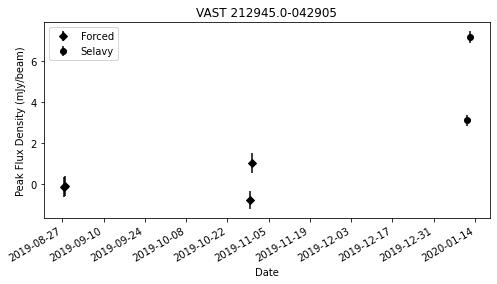

In [32]:
candidate_source = my_run.get_source(3029)
lc = candidate_source.plot_lightcurve()
lc

In [33]:
candidate_source.simbad_search()

<Table length=2>
       MAIN_ID              RA           DEC      ...    RA_d_1      DEC_d_1   
                         "h:m:s"       "d:m:s"    ...     deg          deg     
        object            str13         str13     ...   float64      float64   
--------------------- ------------- ------------- ... ------------ ------------
CRTS J212945.0-042906 21 29 45.0466 -04 29 06.973 ... 322.43769431  -4.48527042
         PSR J2129-04   21 29 45.29   -04 29 11.9 ... 322.43871000  -4.48664000

It's `PSR J2129-04`!

### The eta-v analysis

Now we'll also run the eta-v analysis. This is called by the `my_run.run_eta_v_analysis()`. We will use the same query string as before (copied again here for clarity, but you wouldn't need to re-define it):

In [35]:
my_query_string = (
    "n_measurements >= 3 "
    "& n_selavy >= 2 "
    "& n_neighbour_dist > 1./60. "
    "& 0.8 < avg_compactness < 1.4 "
    "& n_relations == 0"
)

Now we run the analysis, using the `run_eta_v_analysis` function, where we use `1 sigma` as the threshold value to select candidates. It returns the eta and v threshold values (see Rowlinson et al. paper), a dataframe of candidate sources and a plot for visualisation.

In [47]:
eta_thresh, v_thresh, eta_v_candidates, plot = my_run.run_eta_v_analysis(1.0, 1.0, query=my_query_string)
print(eta_thresh, v_thresh)

2.6662501334820203 0.20625442504036243


View the plot from the analysis. The datapoints are colour coded to represent the number of selavy (i.e actual) detections.

In [46]:
# use the bokeh `show` function imported at the beginning.
show(plot)

By looking at the plot above, there is one source that is clearly beyond the 1 sigma threshold in both metrics. If you hover over the point you'll see it is source `3029` - `PSR J2129-04`.

The other 83 candidates can be explored using the candidates dataframe returned by the analysis:

In [48]:
eta_v_candidates

wavg_ra  wavg_dec  avg_compactness  wavg_uncertainty_ew  \
id                                                                  
3      322.061919 -3.652187         1.106793             0.000064   
282    321.114488 -3.477666         1.076348             0.000084   
308    323.101529 -3.234671         1.103508             0.000080   
524    320.770030 -3.801258         1.190238             0.000135   
616    316.634659 -2.229493         1.357491             0.000156   
...           ...       ...              ...                  ...   
16177  321.695479 -3.012086         1.354895             0.000159   
16340  323.389343 -6.618923         1.082266             0.000088   
16473  316.265201 -6.283909         1.233793             0.000102   
16485  317.327950 -7.360373         1.116391             0.000089   
17013  320.659825 -5.431004         1.094514             0.000077   

       wavg_uncertainty_ns  avg_flux_int  avg_flux_peak  max_flux_peak  \
id                                                                       
3                 0.000064     11.282667      10.265667         14.492   
282               0.000084      4.579833       4.243167          5.941   
308               0.000080      5.191500       4.571000          6.399   
524               0.000135      2.643167       2.221667          3.060   
616               0.000156      2.500000       1.907667          2.557   
...                    ...           ...            ...            ...   
16177             0.000159      2.293333       1.787167          2.450   
16340             0.000088      5.126600       4.777800          6.097   
16473             0.000102      4.046200       3.319600          4.450   
16485             0.000089      1.756087       1.613887          2.645   
17013             0.000077      1.050383       0.985983          1.712   

          v_int    v_peak    eta_int    eta_peak    new  new_high_sigma  \
id                                                                        
3      0.318601  0.320678  44.727039  144.445660  False        0.000000   
282    0.298475  0.274615   8.679739   20.308550  False        0.000000   
308    0.430337  0.332745  27.591386   40.148093  False        0.000000   
524    0.266859  0.236706   1.946357    4.294157  False        0.000000   
616    0.278050  0.250268   1.256745    2.947016  False        0.000000   
...         ...       ...        ...         ...    ...             ...   
16177  0.176205  0.256774   0.299051    3.169843  False        0.000000   
16340  0.233562  0.207722   4.458331   14.219549  False        0.000000   
16473  0.197887  0.234372   2.912591   11.826323  False        0.000000   
16485  0.439329  0.372280   2.392493    4.066830  False        0.000000   
17013  0.800864  0.772664   2.358754    2.957575   True        5.088652   

       n_neighbour_dist  n_measurements  n_selavy  n_forced  n_siblings  \
id                                                                        
3              0.048327               6         6         0           0   
282            0.030164               6         6         0           0   
308            0.072507               6         6         0           0   
524            0.031288               6         6         0           0   
616            0.101434               6         6         0           0   
...                 ...             ...       ...       ...         ...   
16177          0.044878               6         6         0           0   
16340          0.059198               5         5         0           0   
16473          0.024438               5         5         0           0   
16485          0.057795               5         3         2           0   
17013          0.032490               5         2         3           0   

       n_relations  
id                  
3                0  
282              0  
308              0  
524              0  
616              0  
...            ...  
16177            0  
16340   